# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow opencv-python matplotlib

Defaulting to user installation because normal site-packages is not writeable


In [ ]:
!pip list

In [2]:
import tensorflow as tf
import os

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [5]:
import cv2
import imghdr

C:\Users\saravanan013\AppData\Local\Temp\ipykernel_3256\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [10]:
data_dir = 'data' 

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 421 files belonging to 2 classes.


In [16]:
data_iterator = data.as_numpy_iterator()

In [17]:
batch = data_iterator.next()

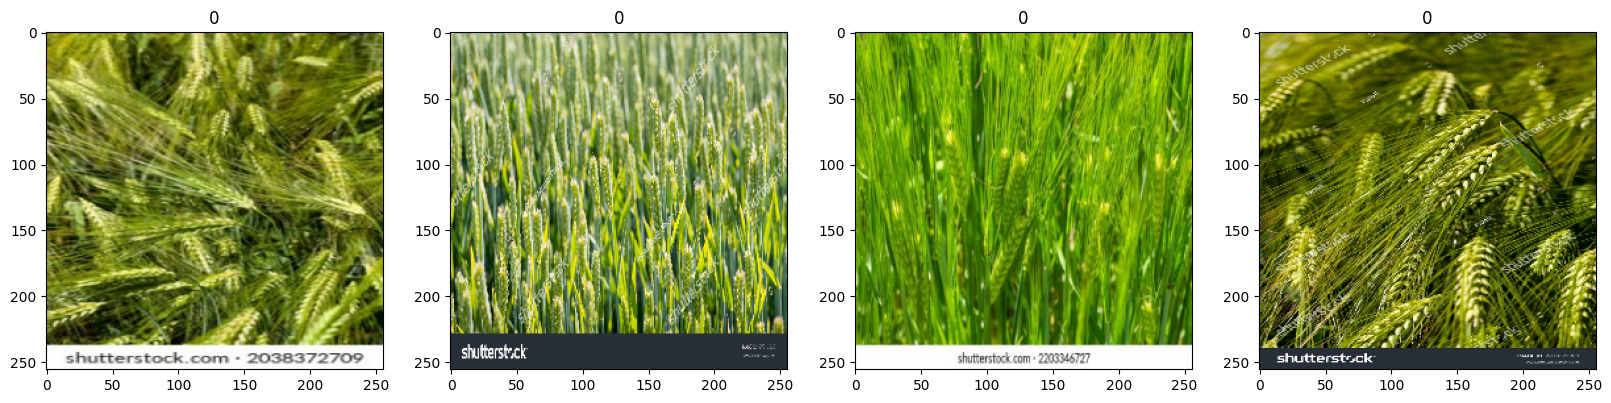

In [18]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [19]:
data = data.map(lambda x,y: (x/255, y))

In [20]:
data.as_numpy_iterator().next()

(array([[[[0.8860907 , 0.874326  , 0.8390319 ],
          [0.8860907 , 0.874326  , 0.8390319 ],
          [0.890069  , 0.8783043 , 0.8430102 ],
          ...,
          [0.8241881 , 0.7575782 , 0.6789766 ],
          [0.8145156 , 0.7471507 , 0.6666013 ],
          [0.8114452 , 0.74085695, 0.654311  ]],
 
         [[0.8818015 , 0.8700368 , 0.83474267],
          [0.88223445, 0.87046975, 0.83517563],
          [0.8873145 , 0.8755498 , 0.8402557 ],
          ...,
          [0.81187195, 0.7456938 , 0.66269916],
          [0.80662173, 0.7413256 , 0.6513021 ],
          [0.8037006 , 0.73351955, 0.64035165]],
 
         [[0.8775123 , 0.8657476 , 0.83045346],
          [0.8805913 , 0.86882657, 0.83353245],
          [0.885639  , 0.8738743 , 0.8385802 ],
          ...,
          [0.8042808 , 0.7327053 , 0.6415367 ],
          [0.7975167 , 0.72725517, 0.6314968 ],
          [0.7931236 , 0.7249495 , 0.6234437 ]],
 
         ...,
 
         [[1.        , 1.        , 1.        ],
          [1.     

# 5. Split Data

In [21]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [22]:
train_size

9

In [23]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [24]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [29]:
model = Sequential()

In [30]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [31]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

# 7. Train

In [33]:
logdir='logs'

In [34]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [35]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 369ms/step - accuracy: 0.5782 - loss: 0.7776 - val_accuracy: 0.8281 - val_loss: 0.4295
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 364ms/step - accuracy: 0.8994 - loss: 0.3548 - val_accuracy: 0.9219 - val_loss: 0.2101
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 355ms/step - accuracy: 0.9289 - loss: 0.1473 - val_accuracy: 0.8281 - val_loss: 0.5230
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.9096 - loss: 0.2733 - val_accuracy: 0.9688 - val_loss: 0.0727
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 350ms/step - accuracy: 0.9462 - loss: 0.1480 - val_accuracy: 0.9688 - val_loss: 0.0709
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 359ms/step - accuracy: 0.9657 - loss: 0.0882 - val_accuracy: 0.9844 - val_loss: 0.0398
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 345ms/step - accuracy: 0.9472 - loss: 0.0946 - val_accuracy: 0.9844 - val_loss: 0.0678
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 361ms/step - accuracy: 0.9762 - loss: 0.1116 - val_accuracy: 1.0000 - val_loss:

# 8. Plot Performance

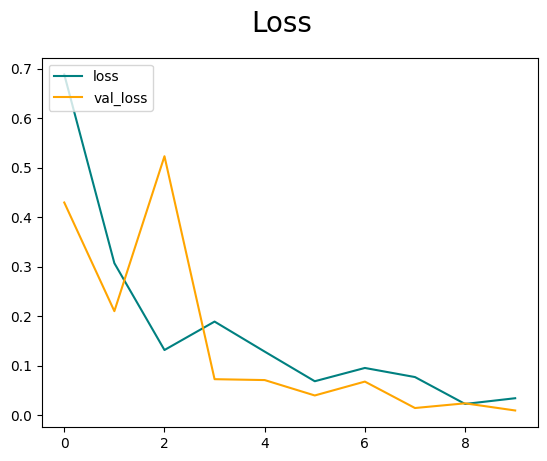

In [36]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

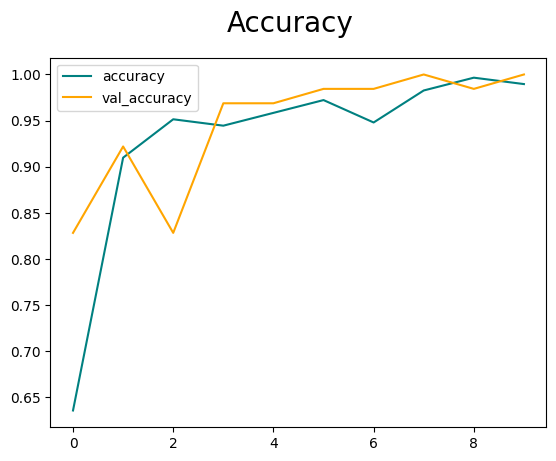

In [37]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [38]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [40]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [41]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


In [42]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32) tf.Tensor(1.0, shape=(), dtype=float32)


# 10. Test

In [43]:
import cv2

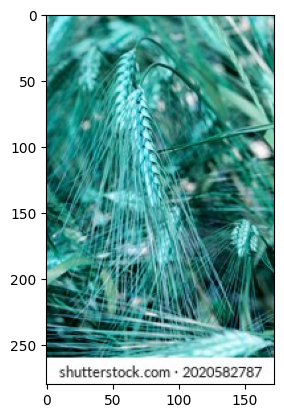

In [57]:
img = cv2.imread('132.jpg')
plt.imshow(img)
plt.show()

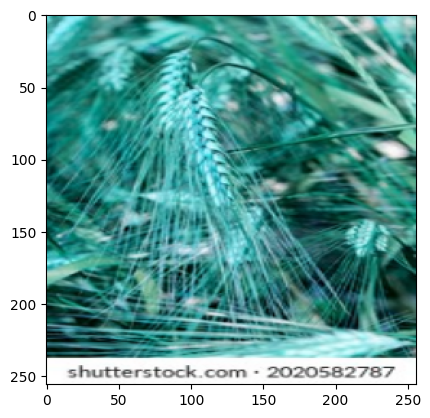

In [58]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [60]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [69]:
yhat

array([[2.5393786e-06]], dtype=float32)

In [61]:
if yhat > 0.5: 
    print(f'Predicted class is Immature')
else:
    print(f'Predicted class is Mature')

Predicted class is Mature


# 11. Save the Model

In [65]:
from tensorflow.keras.models import load_model

In [66]:
model.save(os.path.join('models','imageclassifier.h5'))

In [67]:
new_model = load_model(os.path.join('models','imageclassifier.h5'))

In [70]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


array([[2.5393786e-06]], dtype=float32)